In [1]:
import pandas as pd
import numpy as np
import pickle
import sys
sys.path.append("D:\EvolutionaryMultilayerPerceptron") #加载emlp库
import EvolutionaryMultilayerPerceptron_Rebuild

# 首先加载训练集
# 训练集自变量x为n行d列的np数组，d为维度数，n为训练集条目数
# 训练集因变量为n行1列的np数组
# 训练的所有参数放在一个字典中

config={}
config['X']=X # 训练集自变量
config['Y']=Y # 训练集因变量
config['TrainDataPercentage']=0.9 # 训练集占比,设置为1则不启用验证检查
config['PenaltyCoefficient']=[0.33,1] # 惩罚项系数
config['PopSize']=30 # nsga2种群数
config['ActivateFunction']='Tanh' # 激活函数,或者写成这样的形式['Tanh','Sigmoid','Relu]
config['MaxIteration']=30 # nsga2最大代数
config['LowerBound']=[20,10,5,0] # 网络神经元数下界
config['UpperBound']=[30,20,10,5] # 网络神经元数上界
config['Precision']=1e-5 # 网络目标精度，达到则停止
config['Epochs']=200000 # 训练轮次
config['MaxValidationCheck']=6 # 最大验证检查失败次数，超过就终止训练 
config['MaxLearningRate']=0.1 # 可变学习率中的最大学习率
config['MinLearningRate']=0.01 # 可变学习率中的最小学习率
config['PercentageErrorBias']=1e-5 # 百分比误差偏移，修正百分比误差过大

config['UsePCA']=True # 主成分分析
config['ExplainedVarianceRatio']=0.95 #主成分分析的方差解释比

Trainer=EvolutionaryMultilayerPerceptron_Rebuild.EmlpTrainer(config) # 训练类
Trainer.Train() # 训练
Result=Trainer.GetTrainResult() # 返回训练结果
Trainer.DrawParetoSet() # 绘制当前训练的帕累托解集

NameError: name 'X' is not defined

In [ ]:
Handler=EvolutionaryMultilayerPerceptron_Rebuild.EmlpResultHandler(Result)
Handler.PrintModel() # 用文字打印帕累托解集
Handler.DrawParetoSet() # 绘制佩雷托解集
Handler.DrawPercentageErrorHistogram() # 绘制百分比绝对值误差直方图
Handler.DrawErrorHistogram() # 绘制绝对值误差直方图
Y=Handler.PredictModel(Topo,X) # Topo为选用的网络拓扑结构，列表，X为要训练的自变量，返回np数组

示例程序，对解析函数的拟合，不使用验证检查

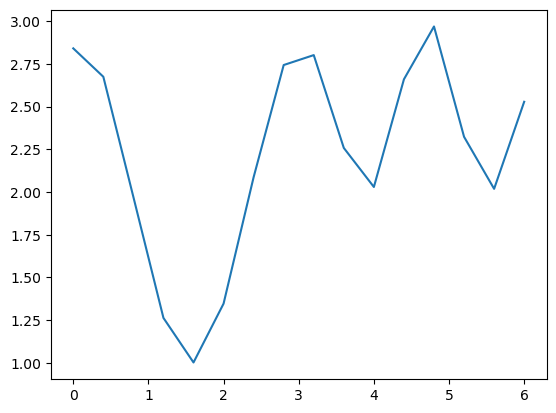

In [ ]:
import pandas as pd
import numpy as np
import pickle
import sys
sys.path.append("D:\EvolutionaryMultilayerPerceptron") #加载emlp库
import EvolutionaryMultilayerPerceptron_Rebuild
from matplotlib import pyplot as plt

# 生成需要拟合的数据
x=np.linspace(0,6,16).reshape(-1,1)
y=np.sin(x+np.cos(x))*np.cos(2*x)+2
plt.plot(x,y)
plt.show()

config={}
config['TrainDataPercentage']=1
config['PenaltyCoefficient']=[0.1,0.2]
config['PopSize']=7
config['ActivateFunction']='Sigmoid'
config['MaxIteration']=7
config['LowerBound']=[10,0,0]
config['UpperBound']=[21,21,21]
config['ValidationCheckInterval']=1000
config['Precision']=1e-7
config['Epochs']=40000
config['MaxValidationCheck']=10
config['MaxLearningRate']=0.01
config['MinLearningRate']=0.005
config['PercentageErrorBias']=1e-5
config['UsePCA']=False
config['ExplainedVarianceRatio']=0.95

config['X']=x
config['Y']=y
obj=EvolutionaryMultilayerPerceptron_Rebuild.EmlpTrainer(config)
obj.Train()
with open('示例1.pickle', 'wb') as file:
    pickle.dump(obj.GetTrainResult(), file)
obj.DrawParetoSet()

展示结果

模型网络结构为:[20, 20, 21],	Emlp误差为0.001899518072605133	总神经元数:61	总数据集百分比Rmse误差:0.00019960812419179483	总数据集Rmse误差:0.0004183898439938023


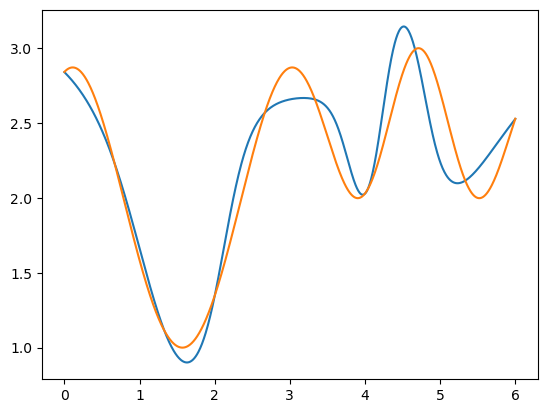

In [ ]:
import pandas as pd
import numpy as np
import pickle
import sys
sys.path.append("D:\EvolutionaryMultilayerPerceptron") #加载emlp库
import EvolutionaryMultilayerPerceptron_Rebuild
from matplotlib import pyplot as plt

with open('示例1.pickle', 'rb') as file:
    loaded_data = pickle.load(file)
obj=EvolutionaryMultilayerPerceptron_Rebuild.EmlpResultHandler(loaded_data)
obj.PrintModel()
x=np.linspace(0,6,1000).reshape(-1,1)
y=obj.PredictModel([20, 20, 21],x)
plt.plot(x,y)
plt.plot(x,np.sin(x+np.cos(x))*np.cos(2*x)+2)
plt.show()